# Programación lineal

> La programación lineal es el campo de la optimización matemática dedicado a maximizar o minimizar (optimizar) funciones lineales, denominada función objetivo, de tal forma que las variables de dicha función estén sujetas a una serie de restricciones expresadas mediante un sistema de ecuaciones o inecuaciones también lineales.


<img style="float: right; margin: 0px 0px 15px 15px;" src="https://upload.wikimedia.org/wikipedia/commons/thumb/0/0c/Linear_Programming_Feasible_Region.svg/2000px-Linear_Programming_Feasible_Region.svg.png" width="150px" height="125px" />

<img style="float: center" src="https://upload.wikimedia.org/wikipedia/commons/thumb/e/ef/3dpoly.svg/220px-3dpoly.svg.png" width="200px" height="125px" />


**Referencias:**
- https://es.wikipedia.org/wiki/Programaci%C3%B3n_lineal
- https://docs.scipy.org/doc/scipy-0.18.1/reference/optimize.html
- http://bdigital.unal.edu.co/5037/4/guillermojimenezlozano.2006_Parte1.pdf

## 1. Apuntes históricos

<img style="float: right" src="https://upload.wikimedia.org/wikipedia/commons/5/5e/JohnvonNeumann-LosAlamos.gif" width="150px" height="125px" />


- 1826:	Joseph Fourier anticipa la programación lineal. Carl Friedrich Gauss resuelve ecuaciones lineales por eliminación "gaussiana".
- 1902:	Gyula Farkas concibe un método para resolver sistemas de inecuaciones.
- Es hasta la Segunda Guerra Mundial que se plantea la programación lineal como un modelo matemático para planificar gastos y retornos, de modo que se reduzcan costos de guerra y aumentar pérdidas del enemigo. Secreto hasta 1947 (posguerra).
- 1947:	George Dantzig publica el algoritmo simplex y John von Neumann desarrolló la teoría de la dualidad. Se sabe que Leonid Kantoróvich también formuló la teoría en forma independiente.
- Fue usado por muchas industrias en la planificación diaria.

**Hasta acá, tiempos exponenciales de solución. Lo siguiente, tiempo polinomial.**

- 1979: Leonid Khachiyan, diseñó el llamado Algoritmo del elipsoide, a través del cual demostró que el problema de la programación lineal es resoluble de manera eficiente, es decir, en tiempo polinomial.
- 1984: Narendra Karmarkar introduce el método del punto interior para resolver problemas de programación lineal.

<img style="float: center" src="https://upload.wikimedia.org/wikipedia/commons/thumb/e/ef/Simplex-description-en.svg/240px-Simplex-description-en.svg.png" width="200px" height="125px" />

## 2. Problemas de programación lineal

### 2.1. Ejemplo básico
Una multinacional farmacéutica desea fabricar un compuesto nutritivo a base de dos productos A y B.  El producto A contiene  $30\%$ de proteínas,  un $1\%$ de grasas y un  $10\%$ de azúcares.  El producto B  contiene  un  $5\%$  de proteínas,  un  $7\%$ de grasas  y un  $10\%$  de  azúcares.

El compuesto debe de tener,  al menos, $25g$ de proteínas,  $6g$ de grasas y $30g$ de azúcares.  El coste del producto A es de $0.6$ u.m./g  y el de B es de $0.2$  u.m./g

Se desea encontrar la cantidad en gramos de cada producto para que el coste total sea mínimo.

Formular el problema de decidir cuánto hacer de cada producto como un problema de programación lineal.

#### Solución

Se desea minimizar el costo del compuesto nutritivo combinando los productos **A** y **B**. Como la información asociada al costo es que el producto **A** cuesta 0.6 u.m./g y el producto **B** cuesta 0.2 u.m./g, definimos:
- $x_A$: la cantidad de gramos de A a ser producidas, y
- $x_B$: la cantidad de gramos de B a ser producidas en la semana,
es decir, $\min 0.6x_A+0.2x_B$.

Bajo las restricciones:
1. El compuesto debe tener **al menos** $25 g$ de proteína: $30\%x_A+5\%x_B\geq 25 \Rightarrow 0.3x_A+0.05x_B\geq 25$.
2. El compuesto debe tener **al menos** $6 g$ de grasa: $1\%x_A+7\%x_B\geq 6 \Rightarrow 0.01x_A+0.07x_B\geq 6$.
3. El compuesto debe tener **al menos** $30 g$ de azúcares: $10\%x_A+10\%x_B\geq 30 \Rightarrow 0.1x_A+0.1x_B\geq 30$.

Finalmente, el problema puede ser expresado en la forma explicada como:
\begin{equation}
\begin{array}{ll}
\min_{x_A,x_B} & 0.6x_A+0.2x_B \\
\text{s. a. }  & -0.3x_A-0.05x_B\leq -25 \\
               & -0.01x_A-0.07x_B\leq -6 \\
               & -0.1x_A-0.1x_B\leq -30,
\end{array}
\end{equation}

o, eqivalentemente
\begin{equation}
\begin{array}{ll}
\min_{\boldsymbol{x}} & \boldsymbol{c}^\top\boldsymbol{x} \\
\text{s. a. }        & \boldsymbol{A}_{eq}\boldsymbol{x}=\boldsymbol{b}_{eq} \\
                     & \boldsymbol{A}\boldsymbol{x}\leq\boldsymbol{b},
\end{array}
\end{equation}
con
- $\boldsymbol{c}=\left[0.6 \quad 0.2\right]^\top$,
- $\boldsymbol{A}=\left[\begin{array}{cc}-0.3 & -0.05 \\ -0.01 & -0.07\\ -0.1 & -0.1\end{array}\right]$, y
- $\boldsymbol{b}=\left[-25 \quad -6\quad -30\right]^\top$.

Preferiremos, en adelante, la notación vectorial/matricial.

Solución gráfica:

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def prote(xA):
  xB=(25-0.3*xA)/0.05
  return xB
def grasa(xA):
  xB=(6-0.01*xA)/0.07
  return xB
def azucar(xA):
  xB=(30-0.1*xA)/0.1
  return xB

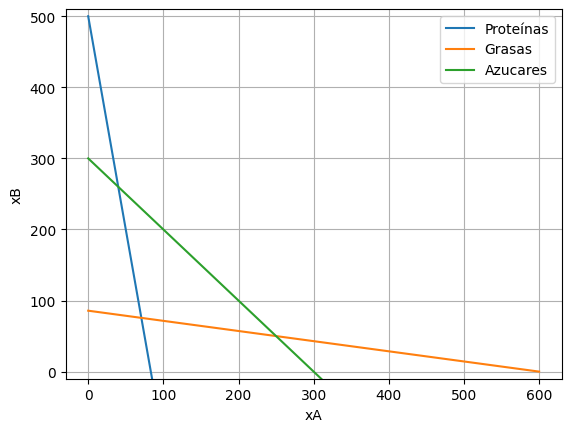

In [4]:
xA=np.linspace(0,600,100)
plt.plot(xA,prote(xA),label='Proteínas')
plt.plot(xA,grasa(xA),label='Grasas')
plt.plot(xA,azucar(xA),label='Azucares')
plt.legend()                             # Muestra las etiquetas
plt.xlabel('xA')
plt.ylabel('xB')
plt.ylim([-10,510])
plt.grid()

In [5]:
# Primer punto a evaluar: xA=0 en la restricción de proteínas
prote(0) # Cantidad en gramos de 'xB'

500.0

In [6]:
# Costo del compuesto nutritivo
def costo(xA,xB):
  return 0.6*xA+0.2*xB

In [7]:
# Costo del primer punto
costo(0,500)

100.0

In [8]:
# Segundo punto: xB=0 en la restricción de grasas
#
# Resolvemos grasa(xA)=0 para 'xA'
import sympy as sym

sym.var('xA')
sym.solve(grasa(xA))

[600.000000000000]

In [9]:
grasa(600)

0.0

In [10]:
# Costo del segundo punto
costo(600,0)

360.0

In [12]:
# Tercer punto: Donde se satisfacen exactamente las restricciones de proteínas y azucares
#
# Resolvemos prote(xA)=azucar(xA) para 'xA'
sym.solve(prote(xA)-azucar(xA))

[40.0000000000000]

In [13]:
prote(40),azucar(40) # xB

(260.0, 260.0)

In [14]:
# Costo del tercer punto
costo(40,260)

76.0

In [15]:
# Cuarto punto: Donde se satisfacen exactamente las restricciones de grasas y azucares
#
# Resolvemos grasa(xA)=azucar(xA) para 'xA'
sym.solve(grasa(xA)-azucar(xA))

[250.000000000000]

In [16]:
grasa(250),azucar(250) # 'xB'

(49.99999999999999, 50.0)

In [17]:
# Costo para el cuarto punto
costo(250,50)

160.0

In [18]:
# Cantidad de grasas en el compuesto
xa=40
xb=260
0.01*xa+0.07*xb

18.6

**Resultado:**

La combinación que minimiza el costo del producto nutritivo es
* producto **A**:  40 g,
* producto **B**: 260 g.

Resultando en 25 g de proteínas, 30 g de azucares y 18.6 g de grasa, con un costo de 76 u.m.

---

### 2.2. Ejemplo básico 2
Una  fábrica  de  carrocerías  de  automóviles  y camiones  tiene  dos naves.

+ En  la nave A,  para  hacer  la  carrocería  de  un  camión,  se  invierten  siete  días-operario,  para  fabricar  la  de  un  coche  se  precisan dos días-operario.

+ En la nave B se invierten tres días operario tanto en carrocerías de camión como de coche.

Por limitaciones de mano de obra y maquinaria, la nave A dispone de $300$ días operario, y la nave B de $270$ días-operario.

Si los beneficios que se obtienen por cada camión son de $600$ u.m y por  cada  automóvil  $200$ u.m,  ¿cuántas  unidades  de  cada  uno  se deben  producir  para maximizar las  ganancias?

**Nota:** el problema $\max_{\boldsymbol{x}}\boldsymbol{g}(\boldsymbol{x})$ es equivalente a $\min_{\boldsymbol{x}}-\boldsymbol{g}(\boldsymbol{x})$.

**Solución:**

Se desea encontrar la ganancia máxima sabiendo que se generan 600 u.m. de las carrocerías de camión y 200 u.m. de las carrocerías de auto, es decir, si definimos
* $x_C$ como la cantidad de carrocerías de camión producidas y
* $x_A$ como la cantidad de carrocerías de automóvil producidas,

se escribe la función a optimizar como
$$
\max 600x_C+200x_A,
$$
bajo las restricciones de tiempo:
* Para la nave A: $7x_C+2x_A\leq300$,
* para la nave B: $3x_C+3x_A\leq270$.

In [20]:
def naveA(xA):
  xC=(300-2*xA)/7
  return xC
def naveB(xA):
  xC=(270-3*xA)/3
  return xC
def ganancia(xC,xA):
  return 600*xC+200*xA

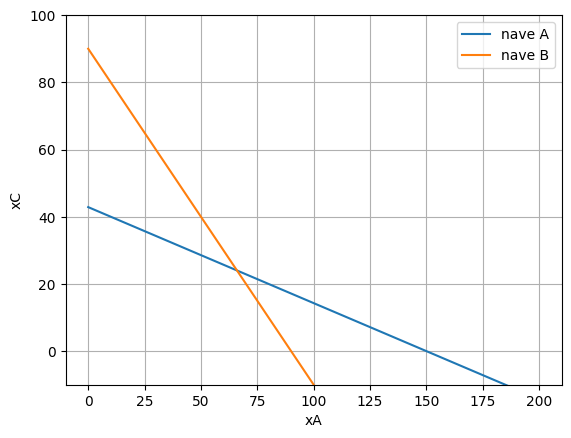

In [25]:
xA=np.linspace(0,200,100)
plt.plot(xA,naveA(xA),label='nave A')
plt.plot(xA,naveB(xA),label='nave B')
plt.legend()
plt.xlabel('xA')
plt.ylabel('xC')
plt.ylim([-10,100])
plt.grid()

In [26]:
# Primer punto xA=0 evaluado en la restricción de la nave A
naveA(0) # xC

42.857142857142854

In [28]:
# Usamos el valor entero más cercano hacia abajo (porque hacia arriba no satisface la restricción)
#
# Ganancia del primer punto
ganancia(42,0)

25200

In [29]:
# Segundo punto: donde se usan todos los días disponibles
#
# Resolvemos naveA(xA)=naveB(xA) para 'xA'
sym.var('xA')
sym.solve(naveA(xA)-naveB(xA))

[66]

In [30]:
naveA(66),naveB(66) # xC

(24.0, 24.0)

In [31]:
# Ganancia del segundo point
ganancia(24,66)

27600

In [32]:
# Tercer punto: xC=0 en la restricción de la nave B
#
# Resolvemos naveB(xA)=0 para 'xA'
sym.solve(naveB(xA))

[90]

In [33]:
naveB(90) # xC

0.0

In [34]:
# Ganancia del tercer punto
ganancia(0,90)

18000

**Resultado:**

Produciendo 24 carrocerías de camión y 66 de automóvil conseguimos una ganancia de 27600 u.m. usando la totalidad de días disponibles en ambas naves.

---

In [38]:
c=np.array([-600,-200]) # xC,xA. Coeficientes negativos=maximización
A=np.array([[7,2],      # restricción con signo 'menor que'
            [3,3]])
b=np.array([300,270])

In [39]:
opt.linprog(c,A,b)

        message: Optimization terminated successfully. (HiGHS Status 7: Optimal)
        success: True
         status: 0
            fun: -27600.0
              x: [ 2.400e+01  6.600e+01]
            nit: 2
          lower:  residual: [ 2.400e+01  6.600e+01]
                 marginals: [ 0.000e+00  0.000e+00]
          upper:  residual: [       inf        inf]
                 marginals: [ 0.000e+00  0.000e+00]
          eqlin:  residual: []
                 marginals: []
        ineqlin:  residual: [ 0.000e+00  0.000e+00]
                 marginals: [-8.000e+01 -1.333e+01]
 mip_node_count: 0
 mip_dual_bound: 0.0
        mip_gap: 0.0

La función `linprog` regresa un objeto de tipo solución con atributos:
* `fun`: es el resultado de la función optimizada,
* `x`: es el vector de las variables que generan la solución óptima,
* `ineqlin.residuals`: es el exceso de las restricciones de desigualdad.

---


#### Bueno, y una vez planteado, ¿cómo se resuelve el problema?



Este problema está sencillo pues solo es en dos variables. La solución gráfica es válida.

Resolviendo el problema 2 (Maximización de utilidad en carros y camiones), con la función `linprog`

## 3. ¿Cómo se resuelve en python?

### 3.1 Librería `SciPy`

<img style="float: right; margin: 0px 0px 15px 15px;" src="https://scipy.org/images/logo.svg" width="200px" height="75px" />

`SciPy` es un software de código abierto basado en `Python` para matemáticas, ciencia e ingeniería.

La **Librería `SciPy`** es uno de los paquetes principales y provee varias rutinas numéricas eficientes. Entre ellas, para integración numérica y optimización.

En esta clase, y en lo que resta del módulo, estaremos utilizando el módulo `optimize` de la librería `SciPy`.

**Importémoslo**

In [35]:
import scipy.optimize as opt

# Importar el módulo optimize de la librería scipy

El módulo `optimize` que acabamos de importar contiene varias funciones para optimización y búsqueda de raices. Entre ellas se encuentra la función `linprog`

---

In [40]:
opt.linprog?

**Actividad.** Mónica hace aretes y cadenitas de joyería. Es tan buena, que todo lo que hace lo vende.

Le toma 30 minutos hacer un par de aretes y una hora hacer una cadenita, y como Mónica también es estudiante, solo dispone de 10 horas a la semana para hacer las joyas. Por otra parte, el material que compra solo le alcanza para hacer 15 unidades (el par de aretes cuenta como unidad) de joyas por semana.

La utilidad que le deja la venta de las joyas es $\$15$ en cada par de aretes y $\$20$ en cada cadenita.

¿Cuántos pares de aretes y cuántas cadenitas debería hacer Mónica para maximizar su utilidad?

Formular el problema en la forma explicada y obtener la solución gráfica (puede ser a mano).

**Diez minutos: quien primero lo haga, comparte pantalla para explicarlo y le subiré la nota de alguna tarea a 100.**

### 3.2 Solución del ejemplo básico con linprog
Ya hicimos la solución gráfica. Contrastemos con la solución que nos da `linprog`

- $\boldsymbol{c}=\left[0.6 \quad 0.2\right]^\top$,
- $\boldsymbol{A}=\left[\begin{array}{cc}-0.3 & -0.05 \\ -0.01 & -0.07\\ -0.1 & -0.1\end{array}\right]$, y
- $\boldsymbol{b}=\left[-25 \quad -6\quad -30\right]^\top$.

## 4. Problema de transporte 1
- **Referencia**: http://bdigital.unal.edu.co/5037/4/guillermojimenezlozano.2006_Parte1.pdf

Una  empresa tiene dos factorías A y B.  En ellas  se fabrica un determinado  producto, a razón de 500  y 400 unidades por día respectivamente.  El producto  ha  de  ser distribuido posteriormente  a  tres  centros  C,  D  y  E,  que  requieren,  respectivamente,  200,  300  y  400  unidades.  Los  costos  de  transportar cada unidad del producto desde cada factoría a cada centro distribuidor son los  indicados  en la tabla  siguiente:

Factoría|C|D|E|Fabricación (Unidades)
:----|----|----|----|----
A|  50 u.m|60 u.m|10 u.m|500 u
B|  25 u.m|40 u.m|20 u.m|400 u
Demanda|200|300|400|

**¿De qué manera  deben  organizar  el transporte a fin de que los gastos sean mínimos?**


Formulemos el problema para ser resuelto por la programación lineal con
- $x_1$: unidades transportadas de la factoría "A" al centro "C"
- $x_2$: unidades transportadas de la factoría "A" al centro "D"
- $x_3$: unidades transportadas de la factoría "A" al centro "E"
- $x_4$: unidades transportadas de la factoría "B" al centro "C"
- $x_5$: unidades transportadas de la factoría "B" al centro "D"
- $x_6$: unidades transportadas de la factoría "B" al centro "E"

se tienen las siguientes ecuaciones:

Restricciones de la producción:

- $x_1 + x_2 + x_3 \leq 500$
- $x_4 + x_5 + x_6 \leq 400$

Restricciones del consumo:

- $x_1 + x_4 \geq 200$
- $x_2 + x_5 \geq 300$
- $x_3 + x_6 \geq 400$

La función objetivo será:

$$\min_{x_1,\dots,x_6}50x_1 + 60x_2 + 10x_3 + 25x_4 + 40x_5 + 20x_6$$

Resolver con `linprog`

## 5. Optimización de inversión en bonos

**Referencia:**

In [ ]:
from IPython.display import YouTubeVideo
YouTubeVideo('gukxBus8lOs')

El objetivo de este problema es determinar la mejor estrategia de inversión, dados diferentes tipos de bono, la máxima cantidad que puede ser invertida en cada bono, el porcentaje de retorno y los años de madurez. También hay una cantidad fija de dinero disponible ($\$750,000$). Por lo menos la mitad de este dinero debe ser invertido en bonos con 10 años o más para la madurez. Se puede invertir un máximo del $25\%$ de esta cantidad en cada bono. Finalmente, hay otra restricción que no permite usar más de $35\%$ en bonos de alto riesgo.

Existen seis (6) opciones de inversión con las letras correspondientes $A_i$

1. $A_1$:(Tasa de retorno=$8.65\%$; Años para la madurez=11, Riesgo=Bajo)
1. $A_2$:(Tasa de retorno=$9.50\%$; Años para la madurez=10, Riesgo=Alto)
1. $A_3$:(Tasa de retorno=$10.00\%$; Años para la madurez=6, Riesgo=Alto)
1. $A_4$:(Tasa de retorno=$8.75\%$; Años para la madurez=10, Riesgo=Bajo)
1. $A_5$:(Tasa de retorno=$9.25\%$; Años para la madurez=7, Riesgo=Alto)
1. $A_6$:(Tasa de retorno=$9.00\%$; Años para la madurez=13, Riesgo=Bajo)

Lo que se quiere entonces es maximizar el retorno que deja la inversión.

Este problema puede ser resuelto con programación lineal. Formalmente, puede ser descrito como:

$$\max_{A_1,A_2,...,A_6}\sum^{6}_{i=1} A_iR_i,$$

donde $A_i$ representa la cantidad invertida en la opción, y $R_i$ representa la tasa de retorno respectiva.